In [1]:
import sys
!{sys.executable} -m pip install iminuit==2.2.1

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/bin/python3.6m -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import rootTools as tap

In [3]:
fName = '/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/dataDPi.csv'

1207648
1199809
[ 0.10554326 -0.68960714  0.24045467 ... -0.08040476  0.06000644
  1.75540948]
sig nan
mu nan


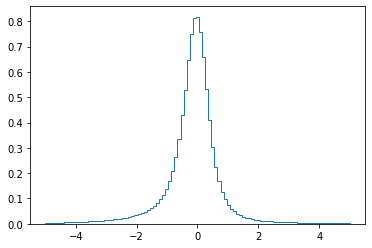

In [86]:
data = pd.read_csv(fName)

vDatamc = data['mcdeltat'].to_numpy()
vData = data["deltat"].to_numpy()
vDataRes = np.subtract(vData,vDatamc)
#vSig = (1e4*Data["TagVLBoostErr"]).to_numpy()

print(vDataRes.size)
vDataRes = vDataRes[~np.isnan(vDataRes)]
print(vDataRes.size)


plt.hist(vDataRes, histtype='step', density = True, bins=np.linspace(-5, 5, 100))
print(vDataRes)

print('sig', np.quantile(vData, q =0.68))
print('mu', np.quantile(vData, q =0.5))

In [87]:
#vData = data['tagvlres'].to_numpy()
#print(vData.size)
#vData = vData[~np.isnan(vData)]
#print(vData.size)
#plt.hist(vData, histtype='step', density = True, bins=np.linspace(-1, 1, 10))
#print(vData)

#print('sig', np.quantile(vData, q =0.68))
#print('mu', np.quantile(vData, q =0.5))

In [88]:
def gausInt(a, b, c, d):
     m = d / c
     s = 1./np.sqrt(c)
     from math import erf
     res = np.sqrt(np.pi)/(2*np.sqrt(c)) * (erf((b*c-d)/np.sqrt(c)) - erf((a*c-d)/np.sqrt(c)))
     
     return res

def convExpGaus(sK, tau, x):
     c = 1./(2*sK*sK)
     d = 0.5*(x/sK/sK - 1/tau)
     Const = 1./(np.sqrt(2*np.pi) *sK* tau) * np.exp(-1./2 * pow(x/sK,2) + d*d/c)
     return Const * gausInt(0, 1e15, c, d);
  
def Gauss(x, mean, sigma):
    f = 1./(np.sqrt(2*np.pi)*sigma) * np.exp( -1./2 * pow((x-mean)/sigma, 2))
    return f

def fun(x, pars):
    fTMains = pars["fTMains"]
    fTR     = pars["fTR"]
    sigmas  = pars["sigmas"]
    cLMs    = pars["cLMs"]
    cRMs    = pars["cRMs"]
    mus     = pars["mus"]
    
    bigSigmaFrac = pars['bigSigmaFrac']
    fTBigs = pars['fTBigs']
    bigSigmaScale = pars['bigSigmaScale']
    cLBs = pars['cLBs']
    cRBs = pars['cRBs']
    
    ret = 0
    
    # small gauss
    ret += (1-bigSigmaFrac) * (1-fTMains) * Gauss(x, mean=mus, sigma=sigmas)
    ret += (1-bigSigmaFrac) * fTMains*(1.-fTR)*convExpGaus(sigmas, 1./cLMs, mus - x)
    ret += (1-bigSigmaFrac) * fTMains*(fTR)*convExpGaus(sigmas, 1./cRMs,  x - mus )
    # big gauss
    ret += bigSigmaFrac * (1-fTBigs) * Gauss(x, mean=mus, sigma=bigSigmaScale*sigmas)
    ret += bigSigmaFrac * fTBigs*(1.-fTR)*convExpGaus(bigSigmaScale*sigmas, 1./cLBs, mus - x)
    ret += bigSigmaFrac * fTBigs*(fTR)*convExpGaus(bigSigmaScale*sigmas, 1./cRBs,  x - mus )
    
    return ret




In [131]:
import chebFitter as chf
xLim = 10
ch = chf.chebFitter(516 + 1, -xLim, xLim, vDataRes, fun)
#pars = {"mus" : -0.1, "sigmas" : 0.30,  "fTMains" : 0.4, "fTR" : 0.2,  "cLMs" : 0.5, "cRMs" : 0.5, 'bigSigmaScale': 2.0, 'bigSigmaFrac' :0.2,'fTBigs': 0.1, 'cRBs' :0.1, 'cLBs' : 0.1 }

#for xLim = 10

pars = {'mus': -0.021894393611257428, 'sigmas': 0.2966772286233992,
        'fTMains': 0.4948062076680151, 'fTR': 0.31340430614899284, 
        'cLMs': 1.2707771594796793, 'cRMs': 1.262960489679062,
        'bigSigmaScale': 1.788222555961523, 'bigSigmaFrac': 0.35918767594476786,
        'fTBigs': 0.21443091081597934,
        'cRBs': 0.32438876978700115, 'cLBs': 0.3574431443828146}

#pars from mcFit
'''pars = {'mus': 0.030187083708440823, 'sigmas': 0.2262890366929741, 
 'fTMains': 0.6879121782503139, 'fTR': 0.5672982488332009,
 'cLMs': 3.3140215247817544, 'cRMs': 2.3873324559570195,
 'bigSigmaScale': 6.947680846616044, 'bigSigmaFrac': 0.0,
 'fTBigs': 0.6268934047143494, 'cLBs': 0.03283582286852792, 
 'cRBs': 0.564155326599834}'''


'''pars = {'mus': -0.02626095363057232, 'sigmas': 0.3072386712992503, 
 'fTMains': 0.4330089152605952, 'fTR': 0.29621524420552536,
 'cLMs': 1.0678732529526804, 'cRMs': 0.9764846844663775, 
 'bigSigmaScale': 1.881006895250959, 'bigSigmaFrac': 0.3415193416782903,
 'fTBigs': 0.14416447268870816, 
 'cRBs': 0.205387662844106, 'cLBs': 0.26434489064239036}'''
                        

#pars = res
Limits = { 
        'mus': (-10, 10),
        'sigmas': (10, 40),
        'fTMains': (0, 1),
        'fTR': (0, 1),
        'cLMs': (1e-5, 0.1),
        'cRMs': (1e-5, 0.1),
         "bigSigmaScale": (3, 40),
        'bigSigmaFrac' : (0,1),
        'fTBigs' : (0,1),
        'cLBs' : (1e-5, 0.05),
        'cRBs' : (1e-5, 0.05)
        }


res =  ch.fitData(pars)
print(res)


Loading data grid
Done
0.0013670646526506274
0.0033636672005986933
0.014095957197587326
0.004164256728869131
0.020314947258068893
0.032402655227243844
0.016539522274483746
0.009423846054572391
0.008433807552757105
0.008784429216502012
0.0068534264864627825
{'mus': -0.021894393611257428, 'sigmas': 0.2966772286233992, 'fTMains': 0.4948062076680151, 'fTR': 0.31340430614899284, 'cLMs': 1.2707771594796793, 'cRMs': 1.262960489679062, 'bigSigmaScale': 1.788222555961523, 'bigSigmaFrac': 0.35918767594476786, 'fTBigs': 0.21443091081597934, 'cRBs': 0.32438876978700115, 'cLBs': 0.3574431443828146}


In [126]:
def plotHist(d, bins, chFit, res):
    vals, bins = np.histogram(d, bins)
    xCnt  = (bins[1:] + bins[:-1]) / 2
    xSize = (bins[1:] - bins[:-1]) / 2
    
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios':[16,3]}, figsize=(12,8))
    axs[0].set_yscale('log')
    axs[0].errorbar(xCnt, vals, xerr=xSize, yerr=np.sqrt(vals), ls='none', fmt="o")
    
    N = np.dot(vals, 2*xSize) 
    x = np.linspace(bins[0], bins[-1], 500)
    y = N * chFit.funFast(x, res)
    axs[0].plot(x, y)
    
    # plotRatio
    yRat= N * chFit.funFast(xCnt, res) 
    axs[1].errorbar(xCnt, vals/ yRat, xerr=xSize, yerr=np.sqrt(vals)/yRat, ls='none', fmt="o")
    

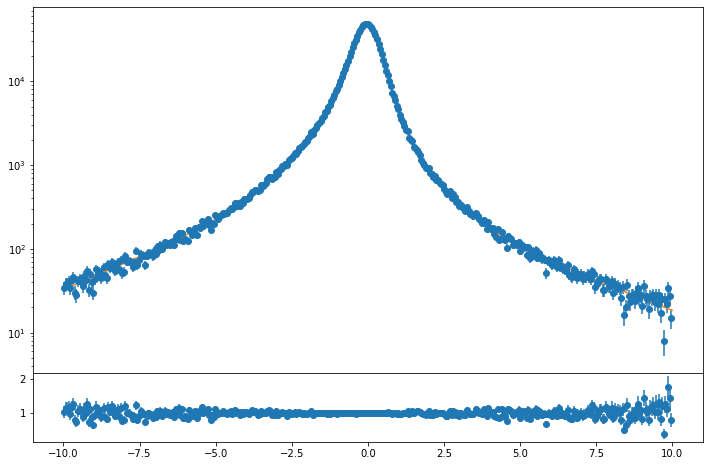

In [127]:
plotHist(vDataRes, np.linspace(-xLim, xLim, 400), ch, res)